In [30]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import Flatten

In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [10]:
# Number of unique words in the train dataset
print("Number of words: ")
print(len(np.unique(np.hstack(X_train))))

Number of words: 
88585


In [51]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [52]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
# Number of unique words in the test dataset
print("Number of words: ")
print(len(np.unique(np.hstack(X_test))))

Number of words: 
51725


In [12]:
# Average length of review
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Review length: 
Mean 238.71 words (176.493674)


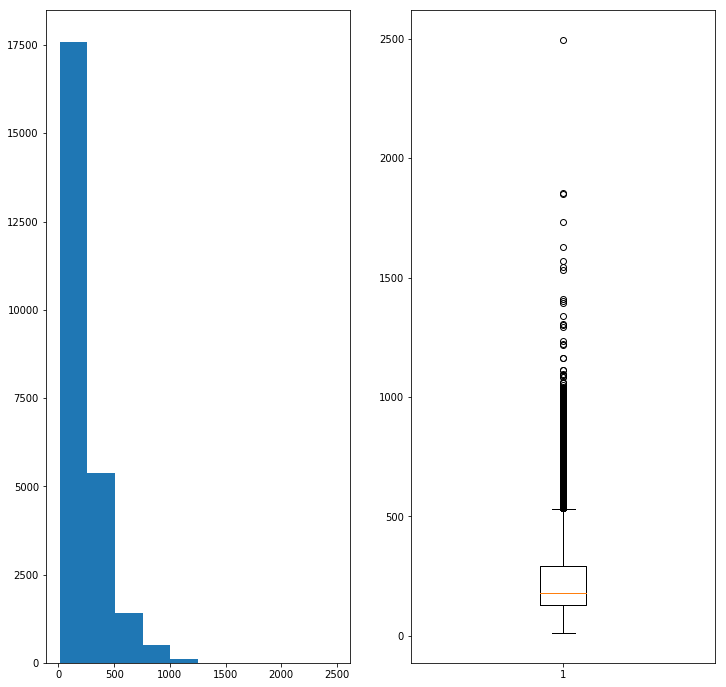

In [22]:
#Plots showing the distribution of length of reviews
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.hist(result)
plt.subplot(1,2,2)
plt.boxplot(result)
plt.show()

In [54]:
# load the dataset but only keep the top 5000 words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [55]:
max_words = 500 #Only the first 500 words in a review are being considered for easier analysis
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
#Modelling with a basic logistic regression to get a base line accuracy
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_predict=model1.predict(X_test)
accuracy_test=accuracy_score(y_test,y_predict)
print(accuracy_test)

0.50848


In [58]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
all_predictions = spam_detect_model.predict(X_test)
accuracy = accuracy_score(y_test, all_predictions)
print(accuracy)

0.4996


In [39]:
#Modelling with RNN
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, y_train,batch_size=128,epochs=12,validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/12
25000/25000 [==============================] - 190s 8ms/step - loss: 0.7226 - acc: 0.5012 - val_loss: 0.7080 - val_acc: 0.5093
Epoch 2/12
25000/25000 [==============================] - 184s 7ms/step - loss: 0.7038 - acc: 0.5098 - val_loss: 0.6947 - val_acc: 0.5216
Epoch 3/12
25000/25000 [==============================] - 190s 8ms/step - loss: 0.6942 - acc: 0.5232 - val_loss: 0.6892 - val_acc: 0.5327
Epoch 4/12
25000/25000 [==============================] - 186s 7ms/step - loss: 0.6908 - acc: 0.5252 - val_loss: 0.6874 - val_acc: 0.5339
Epoch 5/12
25000/25000 [==============================] - 187s 7ms/step - loss: 0.6899 - acc: 0.5286 - val_loss: 0.6873 - val_acc: 0.5329
Epoch 6/12
25000/25000 [==============================] - 186s 7ms/step - loss: 0.6906 - acc: 0.5275 - val_loss: 0.6905 - val_acc: 0.5332
Epoch 7/12
25000/25000 [==============================] - 188s 8ms/step - loss: 0.6912 - acc: 0.5250 - val_loss: 0.6878 - 

In [43]:
#Experimenting with different number of featurs, words in each review and optimizer. 
#Calculating the logit accuracy and rnn accuracy for each combination

logit_score=[]
features=[]
opti=[]
words=[]
time_taken=[]
rnn_score=[]
rnn_acc=[]

top_words=[5000,10000,20000]
max_words = [100,500,1000]
optimizers=['adam','rmsprop']

for top_word in top_words:
    for max_word in max_words:
        for optimizer in optimizers:
            import time
            time_start=time.clock()
            #Loading the required data
            (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_word)
            X_train = sequence.pad_sequences(X_train, maxlen=max_word)
            X_test = sequence.pad_sequences(X_test, maxlen=max_word)
            
            #Modelling with logistic regression
            model1 = LogisticRegression()
            model1.fit(X_train,y_train)
            y_predict=model1.predict(X_test)
            accuracy_test=accuracy_score(y_test,y_predict)
            
            
            #Modelling with RNN
            model = Sequential()
            model.add(Embedding(max_word, 128))
            model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
            model.fit(X_train, y_train,batch_size=128,epochs=10,validation_data=(X_test, y_test))
            score, acc = model.evaluate(X_test, y_test,batch_size=128)
            
            time_elapsed = (time.clock() - time_start)
            
            time_taken.append(time_elapsed)
            logit_score.append(accuracy_test)
            features.append(top_word)
            words.append(max_word)
            opti.append(optimizer)
            rnn_acc.append(acc)
            rnn_score.append(score)
            
            print(accuracy_test,top_word,time_taken,max_word,optimizer,acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.7209 - acc: 0.5047 - val_loss: 0.7111 - val_acc: 0.5068
Epoch 2/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.7072 - acc: 0.4995 - val_loss: 0.6963 - val_acc: 0.5156
Epoch 3/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6977 - acc: 0.5087 - val_loss: 0.6926 - val_acc: 0.5214
Epoch 4/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6940 - acc: 0.5138 - val_loss: 0.6921 - val_acc: 0.5228
Epoch 5/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6933 - acc: 0.5149 - val_loss: 0.6922 - val_acc: 0.5152
Epoch 6/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6924 - acc: 0.5145 - val_loss: 0.6915 - val_acc: 0.5166
Epoch 7/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6924 - acc: 0.5180 - val_loss: 0.6909 - val_acc

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 379s 15ms/step - loss: 0.7157 - acc: 0.5079 - val_loss: 0.7085 - val_acc: 0.5090
Epoch 2/10
25000/25000 [==============================] - 374s 15ms/step - loss: 0.7049 - acc: 0.5118 - val_loss: 0.7018 - val_acc: 0.5101
Epoch 3/10
25000/25000 [==============================] - 375s 15ms/step - loss: 0.6996 - acc: 0.5043 - val_loss: 0.6960 - val_acc: 0.5152
Epoch 4/10
25000/25000 [==============================] - 379s 15ms/step - loss: 0.6932 - acc: 0.5208 - val_loss: 0.6918 - val_acc: 0.5269
Epoch 5/10
25000/25000 [==============================] - 375s 15ms/step - loss: 0.6912 - acc: 0.5248 - val_loss: 0.6875 - val_acc: 0.5374
Epoch 6/10
25000/25000 [==============================] - 373s 15ms/step - loss: 0.6909 - acc: 0.5268 - val_loss: 0.6907 - val_acc: 0.5258
Epoch 7/10
25000/25000 [==============================] - 374s 15ms/step - loss: 0.6916 - acc: 0.5224 - val_loss: 0.

KeyboardInterrupt: 

In [48]:
results = pd.DataFrame()
results['features'] = features
results['no_words'] = words
results['optimizer'] = opti
results['logitstic_reg_acc'] = logit_score
results['rnn_acc']=rnn_acc
results['rnn_score']=rnn_score
results['time_taken']=time_taken

In [49]:
# dataframe showing the top rnn accuracy scores
(results.sort_values(by='rnn_acc',ascending=False))

,features,no_words,optimizer,logitstic_reg_acc,rnn_acc,rnn_score,time_taken
3,5000,500,rmsprop,0.50848,0.82792,0.387746,2373.252398
1,5000,100,rmsprop,0.51400,0.70040,0.569705,413.415951
9,10000,500,rmsprop,0.51456,0.55180,0.681592,2288.908318
2,5000,500,adam,0.50848,0.54752,0.684054,2013.408546
8,10000,500,adam,0.51456,0.53944,0.686275,2538.421039
4,5000,1000,adam,0.50696,0.53092,0.688904,5654.645306
7,10000,100,rmsprop,0.52088,0.52872,0.688931,550.424951
0,5000,100,adam,0.51400,0.51944,0.691671,411.708186
5,5000,1000,rmsprop,0.50696,0.00000,7.971193,5614.690348
6,10000,100,adam,0.52088,0.00000,7.971193,529.194014


#### Findings:
1. Logistic model gave an accuracy of around 50% for all models. NaiaveBayes also has the same accuracy.
2. The best accuracy score of 82.27% is achieved by considering the top 5000 words with first 500 words in each review.
Refrences:
1. https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/
2. http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf